# Домашнее задание (10 баллов)

1. (2 балла) Закончить реализацию `ClassificationDecisionTree` в decision_tree (реализовать feature_importance_, проверить корректность predict) и `RandomForestClassifier` в random_forest (predict/predict_proba). Обратите внимение, что в random_forest в качестве `base_estimator` предполагается использовать `DecisionTreeClassifier` из sklearn, использовать вашу реализацию решающего дерева необязательно. <br> Запуск тестов 
- `python -m unittest discover sem_dt_rf/decision_tree/tests`
- `python -m unittest discover sem_dt_rf/random_forest/tests`
 

In [1]:
!python -m unittest discover sem_dt_rf/decision_tree/tests
!python -m unittest discover sem_dt_rf/random_forest/tests

/Users/macbook/Documents/Главная папка/Ai masters/Второй семестр/Мл 2/Дз/sem_dt_rf/decision_tree/criterio.py:83: RuntimeWarning: invalid value encountered in divide
  pred = np.bincount(classes, minlength=self.n_classes) / classes.shape[0]
.../Users/macbook/Documents/Главная папка/Ai masters/Второй семестр/Мл 2/Дз/sem_dt_rf/decision_tree/criterio.py:68: RuntimeWarning: invalid value encountered in divide
  pred = np.bincount(classes, minlength=self.n_classes) / classes.shape[0]
......
----------------------------------------------------------------------
Ran 9 tests in 0.106s

OK
........
----------------------------------------------------------------------
Ran 8 tests in 0.012s

OK


2. (1 балл) Для регрессионного дерева необходимо использовать такой критерий:
    $$H(R) = \min_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$$
    
    Докажите, что минимум H(R) достигается при $c$:

    $$ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$$

Рассмотрим градиент выражения H(R), 
$ \frac{d (\frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2))}{d c} = -\frac{1}{|R|} \sum_{(x_i, y_i) \in R} 2 * (y_i - c) = 0 $, градиент равен 0 при $ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$. Докажем, что это минимум. 
Взяв вторую производную, получим константу большую 0.

3. (3 балла) Реализуйте регрессионное дерево. В качестве критерия необходимо использовать критерий, определённый в пункте 2. В качестве функции выдачи результатов необходимо использовать среднее значение ответов по всем объектам в листе.

    Сгенерируйте однопризнаковую выборку для тестирования дерева и покажите работу дерева на этой выборке (пример см. ниже, можно использовать свою версию). Отобразите на одном графике значения алгоритма и точки. Что меняется при изменении параметра глубины? Сделайте выводы.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sem_dt_rf.decision_tree.decision_tree import RegressionDecisionTree
%matplotlib inline

In [3]:
# generate example
x_shape = 300
x = np.arange(x_shape) / 100
y = x**3 * np.sin(x**3) + np.random.random(x_shape)

In [4]:
clf_max_depth_3 = RegressionDecisionTree(max_depth=3)
clf_max_depth_3.fit(x[:, np.newaxis], y)
clf_max_depth_6 = RegressionDecisionTree(max_depth=6)
clf_max_depth_6.fit(x[:, np.newaxis], y)
clf_max_depth_10 = RegressionDecisionTree(max_depth=10)
clf_max_depth_10.fit(x[:, np.newaxis], y)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


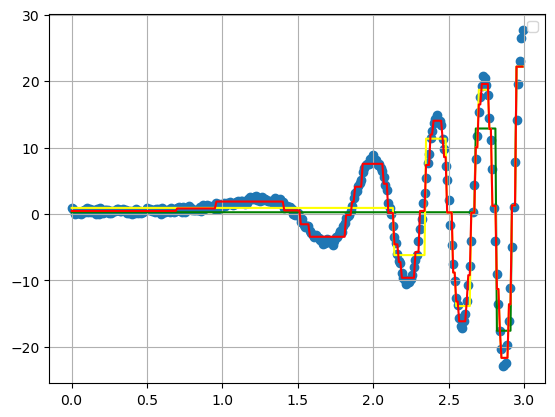

In [5]:
y_pred_max_depth_3 = clf_max_depth_3.predict(x[:, np.newaxis])
y_pred_max_depth_6 = clf_max_depth_6.predict(x[:, np.newaxis])
y_pred_max_depth_10 = clf_max_depth_10.predict(x[:, np.newaxis])

plt.legend(['max_depth_3\n', 'max_depth_6\n', 'max_depth_10\n'])
plt.plot(x, y_pred_max_depth_3, color = 'green')
plt.plot(x, y_pred_max_depth_6, color = 'yellow')
plt.plot(x, y_pred_max_depth_10, color = 'red')


plt.scatter(x, y)
plt.grid()
plt.show()

Как видно, чем больше max_depth, тем больше регрессия похожа на конкретный вид выборки, 
так как при большей глубине в конкретном листе мало близких точек и предсказание получаетя
почти полностью повторяющее обучающую выборку. Так что надо остлеживать переобучение, при увелечении глубины, так как такая регрессия очень сильно подстраивается под обучающую выборку.

Также моожно заметить, что пеньки появляются сначала в местах сс большим разбросом в данных.

4. (4 балла) Протестируйте различные реализации `random_forest` на `fetch_covtype` датасете (можно загрузить с помощью `sklearn.datasets.fetch_covtype`). Возможно, поможет ноутбук с семинара `ensembles_seminar.ipynb`. Для честного сравнения старайтесь использовать похожий набор гиперпараметров.
- ваша реализация (import `RandomForestClassifier as MyRandomForestClassifier` ниже)
- sklearn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- lightgbm https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMModel.html см. параметр `boosting_type`
- xgboost https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

    Что нужно сделать: 
- Разбейте данные на train и test. 
- Оцените качество алгоритмов по метрике (balanced_accuracy_score)[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html]
- Оцените время работы `train` и `predict`
- Сделайте выводы

In [1]:
import sys
sys.path.extend(['/Users/macbook/Documents/Главная папка/Ai masters/Второй семестр/Мл 2/Дз']) # change your path

In [2]:
from sem_dt_rf.random_forest.random_forest import RandomForestClassifier as MyRandomForestClassifier

In [3]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
from xgboost import DMatrix
from xgboost import train
import numpy as np
import time

In [4]:
cov_type = fetch_covtype()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    cov_type.data, cov_type.target - 1, random_state=0, stratify=cov_type.target, train_size=0.25
)

In [ ]:
clf_sklearn = RandomForestClassifier(n_estimators=100, max_depth=12, random_state = 0)
clf_sklearn.fit(X_train, y_train)
y_pred = clf_sklearn.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

In [12]:
def sklearn(n_estimator, max_depth):
    start_time = time.perf_counter()
    clf_sklearn = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, random_state = 0)
    clf_sklearn.fit(X_train, y_train)
    end_time = time.perf_counter()
    time_train = end_time - start_time
    start_time = time.perf_counter()
    y_pred = clf_sklearn.predict(X_test)
    end_time = time.perf_counter()
    time_predict = end_time - start_time
    return balanced_accuracy_score(y_test, y_pred), time_train, time_predict

In [ ]:
my_clf= MyRandomForestClassifier(n_estimators=100, max_depth=8, random_state = 0)
my_clf.fit(X_train, y_train)
y_pred = my_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

In [13]:
def my_rf(n_estimators, max_depth):
    start_time = time.perf_counter()
    my_clf= MyRandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state = 0)
    my_clf.fit(X_train, y_train)
    end_time = time.perf_counter()
    time_fit = end_time - start_time
    start_time = time.perf_counter()
    y_pred = my_clf.predict(X_test)
    end_time = time.perf_counter()
    time_predict = end_time - start_time
    return balanced_accuracy_score(y_test, y_pred), time_fit, time_predict

In [6]:
params = {
    "objective": "multiclass",
    "num_classes": len(np.unique(cov_type.target)),
    "boosting": "rf",
    "seed": 0,
    "verbose": -1,
    "min_child_samples": 10,
    "num_leaves": 2**12,
    "max_depth": 12,
    "bagging_frequency": 0.65,
    "subsample": 0.632,
    "subsample_freq": 1,
    "n_jobs": 1,
}

In [16]:
data_lgb = lgb.Dataset(X_train, y_train)

In [8]:
lgb_clf = lgb.train(params=params, train_set=data_lgb, num_boost_round=100)

In [10]:
y_pred = lgb_clf.predict(X_test).argmax(axis = 1)
balanced_accuracy_score(y_true=y_test, y_pred=y_pred)

0.8706323473465003

In [11]:
def lgb_rf(n_estimators, max_depth):
    params = {
        "objective": "multiclass",
        "num_classes": len(np.unique(cov_type.target)),
        "boosting": "rf",
        "seed": 0,
        "verbose": -1,
        "min_child_samples": 10,
        "num_leaves": 2**max_depth,
        "max_depth": max_depth,
        "bagging_frequency": 0.65,
        "subsample": 0.632,
        "subsample_freq": 1,
        "n_jobs": -1,
    }
    start_time = time.perf_counter()
    clf_LGBM = lgb.train(params = params, train_set = data_lgb, num_boost_round=n_estimators)
    end_time = time.perf_counter()
    train_time = end_time - start_time
    start_time = time.perf_counter()
    y_pred = clf_LGBM.predict(X_test).argmax(axis = 1)
    end_time = time.perf_counter()
    predict_time = end_time - start_time
    return balanced_accuracy_score(y_test, y_pred), train_time, predict_time

In [19]:
params = {
    "objective": "multi:softmax",
    "num_class": len(np.unique(cov_type.target)),
    "booster": "gbtree",
    "eta": 1,
    "num_parallel_tree": 100,
    "min_child_weight": 1,
    "max_leaves": 2**10,
    "max_depth": 10,
    "subsample": 0.632,
    "tree_method": "hist",
    "random_state": 0,
    "n_jobs": -1,
}

In [20]:
xgb_data = xgb.DMatrix(X_train, label=y_train)
xgb_dtest = xgb.DMatrix(X_test)
bst = xgb.train(params, xgb_data, num_boost_round = 1)
y_pred = bst.predict(xgb_dtest)
balanced_accuracy_score(y_test, y_pred)

0.6971689339737621

In [22]:
def xgb_rf(n_estimators, max_depth):
    params = {
        "objective": "multi:softmax",
        "num_class": len(np.unique(cov_type.target)),
        "booster": "gbtree",
        "eta": 1,
        "num_parallel_tree": n_estimators,
        "min_child_weight": 1,
        "max_leaves": 2**max_depth,
        "max_depth": max_depth,
        "subsample": 0.632,
        "tree_method": "hist",
        "random_state": 0,
        "n_jobs": -1,
    }
    start_time = time.perf_counter()
    bst = xgb.train(params, xgb_data, num_boost_round = 1)
    end_time = time.perf_counter()
    time_train = end_time - start_time
    start_time = time.perf_counter()
    y_pred = bst.predict(xgb_dtest)
    end_time = time.perf_counter()
    predict_time = end_time - start_time
    return balanced_accuracy_score(y_test, y_pred), time_train, predict_time

In [23]:
num_trees = np.arange(10, 150, 10)
max_depth = 10
res = np.zeros((num_trees.size, 4))
time_train= np.zeros((num_trees.size, 4))
time_predict = np.zeros((num_trees.size, 4))
for i in range(len(num_trees)):
    sklearn_score, time_sklearn_t, time_sklearn_p = sklearn(num_trees[i], max_depth)
    my_score, time_my_t, time_my_p = my_rf(num_trees[i], max_depth)
    lgb_score, time_lgb_t, time_lgb_p = lgb_rf(num_trees[i], max_depth)
    xgb_score, time_xgb_t, time_xgb_p = xgb_rf(num_trees[i], max_depth)
    res[i] = (sklearn_score, my_score, lgb_score, xgb_score)
    time_train[i] = (time_sklearn_t, time_my_t, time_lgb_t, time_xgb_t)
    time_predict[i] = (time_sklearn_p, time_my_p, time_lgb_p, time_xgb_p)

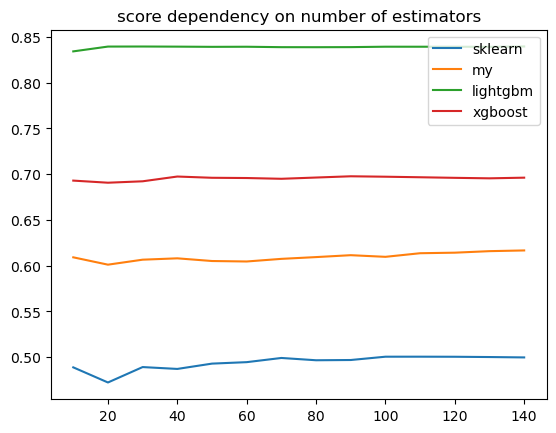

In [27]:
import matplotlib.pyplot as plt

legends = ['sklearn', 'my', 'lightgbm', 'xgboost']
for i in range(4):
    plt.plot(num_trees, res[:, i], label = legends[i])

plt.title("score dependency on number of estimators")
plt.legend()
plt.show()

Как можно заметить, скор после определенного числа эстиматоров не перстает меняться, также lgb показывает себя наилучшим образом

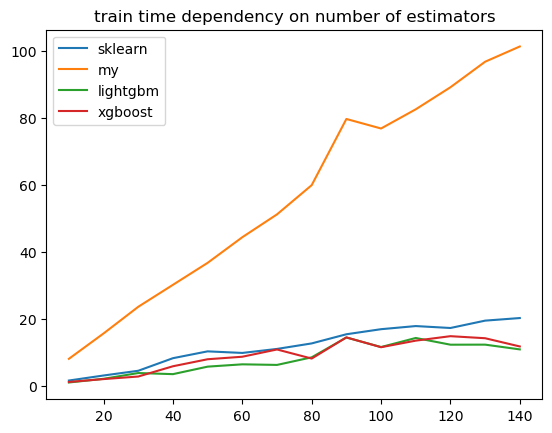

In [31]:
import matplotlib.pyplot as plt

legends = ['sklearn', 'my', 'lightgbm', 'xgboost']
for i in range(4):
    plt.plot(num_trees, time_train[:, i], label = legends[i])

plt.title("train time dependency on number of estimators")
plt.legend()
plt.show()



Как несложно заметить, все 3 бустинга работают примерно за одно время(лайтгбм немного дольше), однако моя реализация работает на порядок дольше, так что лучше юзать уже готовые варианты

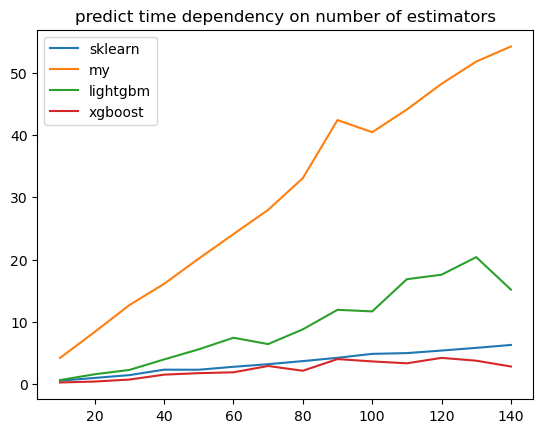

In [30]:
import matplotlib.pyplot as plt

legends = ['sklearn', 'my', 'lightgbm', 'xgboost']
for i in range(4):
    plt.plot(num_trees, time_predict[:, i], label = legends[i])

plt.title("predict time dependency on number of estimators")
plt.legend()
plt.show()

Как видим, моя реализация работает снова наиболее долго, однако тут уже заметно, что лайтгбм работает немного дольше, чем xgboost, sklearn

Общий вывод: моя реализация показывает не худший скор, однако она работает не слишком быстро. Суммарный скор не сильно зависит от числа эстиматоров(после какого-то момента он не возрастает). Время лайгбтм немного дольше, чем у аналогов, однако скор получается гораздо лучше.